# Análisis exploratorio de datos (EDA)

## Contenido

1. Fuentes de datos
2. Descripción de los datos
3. Limpieza de datos
4. Valores faltantes
5. Visualización de datos
6. Referencias

## 1. Fuentes de datos

La fuente de datos de este trabajo es **estrucurada** en formato xlsx. Los datos son **privados** y se eliminó toda la información sensible por privacidad de los datos. Esta base de datos contiene información sobre rotación de personal de empresas manufactureras de Tala, Jalisco. 

Se trata de una base de datos transversal que comprende del 20 de abril del 2021 al 30 de abril del 2024.

In [1]:
# paquetes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import itertools
import altair as alt
alt.renderers.enable('default')

# %matplotlib inline

RendererRegistry.enable('default')

## 2. Descripción de los datos

#### Revisión inicial de los datos originales

In [2]:
# Carga de datos

ruta = r'C:\Users\luism\Documents\3_Proyectos\PrediccionRotacionPersonal\data\rotacion_personal.xlsx'
df_0 = pd.read_excel(ruta)

In [4]:
# Primera visualización de los datos

df_0.head(3)

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia,Motivo de renuncia
0,2023-11-21 00:00:00,22/11/2023,baja,1.0,1979-08-26,Si,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA,SE LE COMPLICÓ EL HORARIO DEL TRANSPORTE PARA ...
1,2023-10-16 00:00:00,17/10/2023,baja,1.0,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA_TRUNCA,FEMENINO,SEPARACION VOLUNTARIA,PROBLEMA PERSONAL
2,2022-02-21 00:00:00,22/02/2022,baja,1.0,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO,SOLO ACUDIÓ A INDUCCION


In [5]:
# Primera visualización de los datos

df_0.tail(3)

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia,Motivo de renuncia
499,13/12/2021,NaN,activo,NaN,NaT,NO,OP PRODUCCION,PRODUCCION,C,TALA,NaN,NaN,SIN_ESTUDIOS,FEMENINO,NaN,NaN
500,26/09/2022,NaN,activo,NaN,NaT,SI,OP PRODUCCION,PRODUCCION,A,TALA,NaN,NaN,SIN_ESTUDIOS,FEMENINO,NaN,NaN
501,2022-03-23 00:00:00,NaN,activo,NaN,NaT,NO,OP PRODUCCION,PRODUCCION,C,TALA,NaN,NaN,SIN_ESTUDIOS,MASCULINO,NaN,NaN


In [6]:
# Sin cambios necesarios

df = df_0

#### Descripción general de la base de datos

In [7]:
# Variables

df.columns

Index(['FECHA DE INGRESO', 'FECHA DE BAJA', 'Estatus', 'Días Laborados',
       'FECHA DE NACIMIENTO', 'No de Crédito Infonavit', 'PUESTO', 'AREA',
       'TURNO', 'MUNICIPIO', 'SALARIO DIARIO', 'SALARIO MENSUAL',
       'ESCOLARIDAD', 'GENERO', 'Tipo de renuncia', 'Motivo de renuncia'],
      dtype='object')

In [8]:
# Información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FECHA DE INGRESO         502 non-null    object        
 1   FECHA DE BAJA            431 non-null    object        
 2   Estatus                  502 non-null    object        
 3   Días Laborados           431 non-null    float64       
 4   FECHA DE NACIMIENTO      288 non-null    datetime64[ns]
 5   No de Crédito Infonavit  502 non-null    object        
 6   PUESTO                   502 non-null    object        
 7   AREA                     498 non-null    object        
 8   TURNO                    502 non-null    object        
 9   MUNICIPIO                502 non-null    object        
 10  SALARIO DIARIO           288 non-null    float64       
 11  SALARIO MENSUAL          288 non-null    float64       
 12  ESCOLARIDAD              502 non-nul

In [14]:
print(df.isnull().sum())

print("Valores nulos totales", {df.isnull().sum().sum()})

FECHA DE INGRESO             0
FECHA DE BAJA               71
Estatus                      0
Días Laborados              71
FECHA DE NACIMIENTO        214
No de Crédito Infonavit      0
PUESTO                       0
AREA                         4
TURNO                        0
MUNICIPIO                    0
SALARIO DIARIO             214
SALARIO MENSUAL            214
ESCOLARIDAD                  0
GENERO                       0
Tipo de renuncia           104
Motivo de renuncia          56
dtype: int64
Valores nulos totales {948}


In [8]:
# Cambiar el formato de las columnas de fecha

df['FECHA DE INGRESO'] = pd.to_datetime(df['FECHA DE INGRESO'], errors='coerce')
df['FECHA DE BAJA'] = pd.to_datetime(df['FECHA DE BAJA'], errors='coerce')
df['FECHA DE NACIMIENTO'] = pd.to_datetime(df['FECHA DE NACIMIENTO'], errors='coerce')

# Convertir las columnas con texto a str

columns_to_convert = [
    'No de Crédito Infonavit', 
    'PUESTO', 
    'AREA', 
    'TURNO', 
    'MUNICIPIO', 
    'ESCOLARIDAD', 
    'GENERO', 
    'Tipo de renuncia', 
    'Motivo de renuncia'
]

# Rellenamos con NaN los espacios vacios y lo convertimos en str

df[columns_to_convert] = df[columns_to_convert].fillna('').astype(str)


C:\Users\luism\AppData\Local\Temp\ipykernel_15268\244686086.py:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FECHA DE BAJA'] = pd.to_datetime(df['FECHA DE BAJA'], errors='coerce')


In [9]:
# Información general

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FECHA DE INGRESO         502 non-null    datetime64[ns]
 1   FECHA DE BAJA            431 non-null    datetime64[ns]
 2   Estatus                  502 non-null    object        
 3   Días Laborados           431 non-null    float64       
 4   FECHA DE NACIMIENTO      288 non-null    datetime64[ns]
 5   No de Crédito Infonavit  502 non-null    object        
 6   PUESTO                   502 non-null    object        
 7   AREA                     502 non-null    object        
 8   TURNO                    502 non-null    object        
 9   MUNICIPIO                502 non-null    object        
 10  SALARIO DIARIO           288 non-null    float64       
 11  SALARIO MENSUAL          288 non-null    float64       
 12  ESCOLARIDAD              502 non-nul

In [10]:
# Variables cuantitativas

df.describe()

,FECHA DE INGRESO,FECHA DE BAJA,Días Laborados,FECHA DE NACIMIENTO,SALARIO DIARIO,SALARIO MENSUAL
count,502,431,431.000000,288,288.000000,288.000000
mean,2022-09-27 01:37:31.792828672,2022-11-08 15:45:31.322505728,63.763341,1991-02-12 20:30:00,258.789306,7705.711806
min,2021-04-20 00:00:00,2021-05-12 00:00:00,1.000000,1960-10-25 00:00:00,200.000000,1750.000000
25%,2022-02-11 12:00:00,2022-04-03 00:00:00,17.000000,1984-12-09 12:00:00,220.000000,6600.000000
50%,2022-09-01 12:00:00,2022-11-03 00:00:00,23.000000,1993-08-15 12:00:00,250.000000,7500.000000
75%,2023-03-21 00:00:00,2023-05-10 12:00:00,55.000000,1999-02-04 06:00:00,270.000000,8100.000000
max,2024-03-10 00:00:00,2024-04-01 00:00:00,608.000000,2022-05-28 00:00:00,600.000000,18000.000000
std,NaN,NaN,101.686887,NaN,64.303304,2028.051647


In [11]:
# Número de términos únicos por varieble

df.nunique()

FECHA DE INGRESO           236
FECHA DE BAJA              253
Estatus                      2
Días Laborados             134
FECHA DE NACIMIENTO        277
No de Crédito Infonavit      4
PUESTO                       7
AREA                         6
TURNO                        4
MUNICIPIO                   13
SALARIO DIARIO              20
SALARIO MENSUAL             22
ESCOLARIDAD                 12
GENERO                       2
Tipo de renuncia            23
Motivo de renuncia         204
dtype: int64

#### Descripción de variables

In [12]:
# Fechas

print("- El rango de la fecha de ingreso va desde {0} hasta {1}.".format(df['FECHA DE INGRESO'].unique().min(), df['FECHA DE INGRESO'].unique().max()))
print("- El rango de la fecha de baja va desde {0} hasta {1}.".format(df['FECHA DE BAJA'].unique().min(), df['FECHA DE BAJA'].unique().max()))
print("- El rango de la fecha de nacimiento va desde {0} hasta {1}.".format(df['FECHA DE NACIMIENTO'].unique().min(), df['FECHA DE NACIMIENTO'].unique().max()))

- El rango de la fecha de ingreso va desde 2021-04-20 00:00:00 hasta 2024-03-10 00:00:00.
- El rango de la fecha de baja va desde 2021-05-12 00:00:00 hasta 2024-04-01 00:00:00.
- El rango de la fecha de nacimiento va desde 1960-10-25 00:00:00 hasta 2022-05-28 00:00:00.


__Nota:__  
Fecha de nacimiento del 2022 es erronea ya que la edad mínima para trabajar es de 18 años, se actualizarán valores menores a 18 con 18.

In [13]:
# Estatus

print("- Los distintos estatus utilizados:", df.Estatus.unique())

- Los distintos estatus utilizados: ['baja' 'activo']


In [14]:
# Días Laborados

print("- El rango de días laborados va de un min {0} hasta {1}, y su promedio es {2}".format(df['Días Laborados'].unique().min(),
                                                                                      df['Días Laborados'].unique().max(),
                                                                 np.round(pd.to_numeric(df['Días Laborados']).mean(), 2)))

- El rango de días laborados va de un min nan hasta nan, y su promedio es 63.76


__Nota:__  
Existen valores núlos que no permiten tener certeza de los mínimos y máximos.

In [15]:
# No de Crédito Infonavit

print("- Los distintos estatus utilizados:", df['No de Crédito Infonavit'].unique())

- Los distintos estatus utilizados: ['Si' 'NO' 'NO ' 'SI']


__Nota:__  
Se tiene que homologar Si y No 

In [16]:
# Puesto

print("- En la base de datos se consideraron {0} puestos distintos:".format(len(df.PUESTO.unique())))
for i in df.PUESTO.unique():
    print("    * "+i)

- En la base de datos se consideraron 7 puestos distintos:
    * OP PRODUCCION
    * OP PRENSA
    * AUXILIAR ALMACEN
    * INSP CALIDAD
    * MONTACARGUISTA
    * INTENDENCIA
    * MECANICO


In [17]:
# Area

print("- En la base de datos se consideraron {0} areas distintas:".format(len(df.AREA.unique())))
for i in df.AREA.unique():
    print("    * "+i)

- En la base de datos se consideraron 6 areas distintas:
    * PRODUCCION
    * PRENSA
    * ALMACEN
    * CALIDAD
    * 
    * MANTENIMIENTO


__Nota:__  
Existen valores en blanco

In [18]:
# Turno

print("- En la base de datos se consideraron {0} turnos distintos:".format(len(df.TURNO.unique())))
for i in df.TURNO.unique():
    print("    * "+i)

- En la base de datos se consideraron 4 turnos distintos:
    * C
    * B
    * A
    * ROLA


In [19]:
# Municipio

print("- En la base de datos se consideraron {0} municipios distintos:".format(len(df.MUNICIPIO.unique())))
for i in df.MUNICIPIO.unique():
    print("    * "+i)

- En la base de datos se consideraron 13 municipios distintos:
    * TALA
    * TLAJOMULCO
    * AHUISCULCO 
    * ZAP
    * HUAXTLA
    * LA VENTA DEL ASTILLERO 
    * ZAMORA
    * EL ARENAL
    * BUENA VISTA 
    * JALISCO
    * CD GUZMAN
    * HUAXTLA 
    * SAN JUAN DE LOS ARCOS 


__Nota:__  
Jalisco no es un municipio, se tiene que revisar.

In [20]:
# Salario diario

print("- El rango de salario diario va de un min {0} hasta {1}, y su promedio es {2}".format(df['SALARIO DIARIO'].unique().min(),
                                                                                      df['SALARIO DIARIO'].unique().max(),
                                                                 np.round(pd.to_numeric(df['SALARIO DIARIO']).mean(), 2)))


- El rango de salario diario va de un min nan hasta nan, y su promedio es 258.79


__Nota:__  
Existen valores nulos que no permiten tener certeza de los mínimos y máximos.

In [21]:
# Salario Mensual

print("- El rango de salario mensual va de un min {0} hasta {1}, y su promedio es {2}".format(df['SALARIO MENSUAL'].unique().min(),
                                                                                      df['SALARIO MENSUAL'].unique().max(),
                                                                 np.round(pd.to_numeric(df['SALARIO MENSUAL']).mean(), 2)))


- El rango de salario mensual va de un min nan hasta nan, y su promedio es 7705.71


__Nota:__  
Existen valores nulos que no permiten tener certeza de los mínimos y máximos.

In [22]:
# Escolaridad

print("- En la base de datos se consideraron {0} escolaridades distintas:".format(len(df.ESCOLARIDAD.unique())))
for i in df.ESCOLARIDAD.unique():
    print("    * "+i)

- En la base de datos se consideraron 12 escolaridades distintas:
    * SECUNDARIA
    * SECUNDARIA_TRUNCA
    * PREPARATORIA
    * PREPARATORIA_TRUNCA
    * PRIMARIA
    * CURSANDO_LICENCIATURA
    * INGENIERO
    * SIN_ESTUDIOS
    * PREPARATORIA_TECNICA
    * CURSANDO_PREPARATORIA
    * CURSANDO_SECUNDARIA
    * LICENCIATURA


In [23]:
# Género

print("- Los distintos géneros utilizados:", df.GENERO.unique())

- Los distintos géneros utilizados: ['FEMENINO' 'MASCULINO']


In [24]:
# Tipo de renuncia

print("- En la base de datos se consideraron {0} tipos de renuncia distintas:".format(len(df['Tipo de renuncia'].unique())))
for i in df['Tipo de renuncia'].unique():
    print("    * "+i)

- En la base de datos se consideraron 23 tipos de renuncia distintas:
    * RENUNCIA VOLUNTARIA
    * SEPARACION VOLUNTARIA 
    * ABANDONO
    * ABANDONO DE EMPLEO
    * VOLUNTARIA
    * BAJA POR FALTAS
    * 
    * RESCISION DE CONTRATO
    * BAJA
    * RENUNCIA X SALARIO
    * BAJA POR CIERRE DE BODEGA
    * RECORTE DE PERSONAL
    * CAMBIO A TIJUANA
    * PENSION POR CESANTIA
    * PENSION DE INVALIDEZ
    * TERMINACION
    * SEPARACION VOLUNTARIA
    * RECISION DE CONTRATO
    * DEFUNCIÓN
    * BAJA POR DESEMPEÑO
    * TERMINATION
    * TERMINO DE CONTRATO
    * TERMINO DE CONTRATO 


__Nota:__  
Se tienen qué englobar las siguientes categorías:

___VOLUNTARIA___: RENUNCIA VOLUNTARIA, SEPARACION VOLUNTARIA, VOLUNTARIA, SEPARACION VOLUNTARIA  
___ABANDONO___: ABANDONO, ABANDONO DE EMPLEO, BAJA POR FALTAS  
___BAJA___: RESCISION DE CONTRATO, BAJA, BAJA POR CIERRE DE BODEGA, RECORTE DE PERSONAL, CAMBIO A TIJUANA, TERMINACION, RECISION DE CONTRATO, BAJA POR DESEMPEÑO, TERMINATION, TERMINO DE CONTRATO, TERMINO DE CONTRATO

Para un total de 7 categorías

In [25]:
# Motivo de renuncia

# ya que se incluyen 203 registros distintos, motivo de renuncia se reservará para un análisis distinto, en este no se incluirá 



In [26]:
# Revisión de missing values

df.isnull().sum()

FECHA DE INGRESO             0
FECHA DE BAJA               71
Estatus                      0
Días Laborados              71
FECHA DE NACIMIENTO        214
No de Crédito Infonavit      0
PUESTO                       0
AREA                         0
TURNO                        0
MUNICIPIO                    0
SALARIO DIARIO             214
SALARIO MENSUAL            214
ESCOLARIDAD                  0
GENERO                       0
Tipo de renuncia             0
Motivo de renuncia           0
dtype: int64

__Nota:__  
Los salarios tienen múchos valores nulos que sería conveniente llenar con la media.  
Quizá vale la pena sólo considerar el salario mensual o el salario diario ya que aportan la misma información  
Los valores nulos en baja y días laborados corresponden a personal que aún está activo  
Fecha de nacimiento se puede rellenear con la media de edades ya que existen 214 valores núlos

## 3. Limpieza de datos

In [27]:
# actualizar index de base de datos

df.reset_index(drop=True, inplace=True)

In [28]:
# eliminar variable `Motivo de renuncia` que no se utilizará en este análisis
try:
    df.drop(columns=['Motivo de renuncia'], inplace=True)
except:
    next
    
df.head(3)

,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
0,2023-11-21,2023-11-22,baja,1.0,1979-08-26,Si,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA
1,2023-10-16,2023-10-17,baja,1.0,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,250.0,7500.0,SECUNDARIA_TRUNCA,FEMENINO,SEPARACION VOLUNTARIA
2,2022-02-21,2022-02-22,baja,1.0,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,200.0,6000.0,SECUNDARIA,FEMENINO,ABANDONO


In [29]:
# revisar tipo de variable

df.dtypes

FECHA DE INGRESO           datetime64[ns]
FECHA DE BAJA              datetime64[ns]
Estatus                            object
Días Laborados                    float64
FECHA DE NACIMIENTO        datetime64[ns]
No de Crédito Infonavit            object
PUESTO                             object
AREA                               object
TURNO                              object
MUNICIPIO                          object
SALARIO DIARIO                    float64
SALARIO MENSUAL                   float64
ESCOLARIDAD                        object
GENERO                             object
Tipo de renuncia                   object
dtype: object

No hay necesidad de transformar las variables ya que todas están en el formato correcto.

In [30]:
# FECHA DE INGRESO

df['FECHA DE INGRESO'].unique()

<DatetimeArray>
['2023-11-21 00:00:00', '2023-10-16 00:00:00', '2022-02-21 00:00:00',
 '2023-10-23 00:00:00', '2023-12-20 00:00:00', '2023-03-23 00:00:00',
 '2023-10-30 00:00:00', '2022-02-15 00:00:00', '2024-01-15 00:00:00',
 '2022-10-17 00:00:00',
 ...
 '2024-01-08 00:00:00', '2023-09-18 00:00:00', '2022-02-02 00:00:00',
 '2021-06-12 00:00:00', '2023-11-06 00:00:00', '2023-12-06 00:00:00',
 '2024-01-29 00:00:00', '2024-01-22 00:00:00', '2024-02-06 00:00:00',
 '2023-07-10 00:00:00']
Length: 236, dtype: datetime64[ns]

In [31]:
# FECHA DE NACIMIENTO

print(df[df['FECHA DE NACIMIENTO'] > "2006-03-01"])


    FECHA DE INGRESO FECHA DE BAJA Estatus  Días Laborados  \
470       2023-03-13           NaT  activo             NaN   

    FECHA DE NACIMIENTO No de Crédito Infonavit          PUESTO     AREA  \
470          2022-05-28                      NO  MONTACARGUISTA  ALMACEN   

    TURNO MUNICIPIO  SALARIO DIARIO  SALARIO MENSUAL   ESCOLARIDAD     GENERO  \
470     C      TALA           375.0          11250.0  PREPARATORIA  MASCULINO   

    Tipo de renuncia  
470                   


## 4. Valores faltantes

##### _Fecha de nacimiento_

Los datos de personas que no cumplan la mayoría de edad en la fecha máxima de la recolección de datos 2024-04-30, se rellenarán con fecha de nacimiento del 01 de marzo del 2006 para alcanzar la mayoría de edad.

In [173]:
# Fecha de nacimiento

df.loc[df['FECHA DE NACIMIENTO'] > "2006-03-01", 'FECHA DE NACIMIENTO'] = "2006-03-01"

print(df[df['FECHA DE NACIMIENTO'] > "2006-03-01"])

Empty DataFrame
Columns: [FECHA DE INGRESO, FECHA ULTIMO REGISTRO, Estatus, Días Laborados, FECHA DE NACIMIENTO, No de Crédito Infonavit, PUESTO, AREA, TURNO, MUNICIPIO, SALARIO MENSUAL, ESCOLARIDAD, GENERO, Tipo de renuncia]
Index: []


In [33]:
# Fecha de nacimiento

# Se rellenan fechas de nacimiento faltantes con media de fechas de nacimiento

media_nacimiento = df['FECHA DE NACIMIENTO'].mean()
print(media_nacimiento)

df['FECHA DE NACIMIENTO'].fillna(media_nacimiento, inplace=True)
print(df['FECHA DE NACIMIENTO'])

1991-01-23 06:10:00
0     1979-08-26 00:00:00
1     1993-09-02 00:00:00
2     1993-10-17 00:00:00
3     1999-08-27 00:00:00
4     2002-06-16 00:00:00
              ...        
497   1995-12-22 00:00:00
498   1991-01-23 06:10:00
499   1991-01-23 06:10:00
500   1991-01-23 06:10:00
501   1991-01-23 06:10:00
Name: FECHA DE NACIMIENTO, Length: 502, dtype: datetime64[ns]


##### _Fecha de baja_

Fecha de baja aporta información pero tiene valores nulos, para darle un mayor uso, se renombra como ultimo registro y se actualizan los valores núlos con el último registro del empleado. 

In [34]:
# Fecha de baja

print(df['FECHA DE BAJA'].unique())

df[df['FECHA DE BAJA'].isnull() & (df['Estatus'] == 'baja')]

<DatetimeArray>
['2023-11-22 00:00:00', '2023-10-17 00:00:00', '2022-02-22 00:00:00',
 '2023-10-24 00:00:00', '2023-12-21 00:00:00', '2023-03-24 00:00:00',
 '2023-11-01 00:00:00', '2023-12-22 00:00:00', '2022-02-17 00:00:00',
 '2024-01-18 00:00:00',
 ...
 '2022-08-03 00:00:00', '2023-02-04 00:00:00', '2023-01-26 00:00:00',
 '2023-01-23 00:00:00', '2023-10-29 00:00:00', '2023-01-31 00:00:00',
 '2023-05-17 00:00:00', '2023-09-07 00:00:00', '2023-09-28 00:00:00',
                 'NaT']
Length: 254, dtype: datetime64[ns]


,FECHA DE INGRESO,FECHA DE BAJA,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia


In [35]:
# Fecha de baja

df['FECHA DE BAJA'].fillna(pd.to_datetime('2024-04-30'), inplace=True)

df.rename(columns={'FECHA DE BAJA': 'FECHA ULTIMO REGISTRO'}, inplace=True)

df['FECHA ULTIMO REGISTRO'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
497    False
498    False
499    False
500    False
501    False
Name: FECHA ULTIMO REGISTRO, Length: 502, dtype: bool

##### _Días laborados_

Ya con la información actualizada en fecha de último registro (antes fecha de baja), se pueden estimar los días laborados para todos los empleados.

In [36]:
# Días laborados

df['Días Laborados'] = (df['FECHA ULTIMO REGISTRO'] - df['FECHA DE INGRESO']).dt.days


##### _Area_

Se filtran los valores en blanco en area y se detecta que todos corresponden a intendencia, valor que se planeaba eliminiar ya que este no tiene relación con este análisis en específico.

In [ ]:
# Area

# Valores en blanco en área

df[df['AREA'] == '']

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
41,2022-09-05,2022-09-14,baja,9,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,SECUNDARIA_TRUNCA,MASCULINO,ABANDONO DE EMPLEO
161,2022-12-12,2023-01-01,baja,20,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,SECUNDARIA_TRUNCA,MASCULINO,ABANDONO DE EMPLEO
279,2023-03-29,2023-05-03,baja,35,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,PREPARATORIA_TRUNCA,MASCULINO,
498,2022-06-06,2024-04-30,activo,694,1991-01-23 06:10:00,SI,INTENDENCIA,,B,TALA,NaN,NaN,SIN_ESTUDIOS,MASCULINO,


In [ ]:
# Area

# Se revisa a qué area están asignadas las personas de intendencia para agregarles a estos 4 registros esa área

df[df['PUESTO'] == 'INTENDENCIA']

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
41,2022-09-05,2022-09-14,baja,9,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,SECUNDARIA_TRUNCA,MASCULINO,ABANDONO DE EMPLEO
161,2022-12-12,2023-01-01,baja,20,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,SECUNDARIA_TRUNCA,MASCULINO,ABANDONO DE EMPLEO
279,2023-03-29,2023-05-03,baja,35,1991-01-23 06:10:00,NO,INTENDENCIA,,C,TALA,NaN,NaN,PREPARATORIA_TRUNCA,MASCULINO,
498,2022-06-06,2024-04-30,activo,694,1991-01-23 06:10:00,SI,INTENDENCIA,,B,TALA,NaN,NaN,SIN_ESTUDIOS,MASCULINO,


In [ ]:
# Ya que se strata de sólamente 4 valores, e intendencia podría no 
# considerarse como personal de producción, se eliminarán estos 4 registros.

df = df[df['PUESTO'] != 'INTENDENCIA']

df[df['PUESTO'] == 'INTENDENCIA']

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO DIARIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia


##### _Salario mensual_

Por la cantidad de valores faltantes la literatura sugiere rellenar este dato con la media

In [ ]:
# Salario mensual

# Se rellenan los salarios faltantes con la media

media_salarios = df['SALARIO MENSUAL'].mean()
print(media_salarios)

df['SALARIO MENSUAL'].fillna(media_salarios, inplace=True)

print("- El rango de salario mensual va de un min {0} hasta {1}, y su promedio es {2}".format(df['SALARIO MENSUAL'].unique().min(),
                                                                                      df['SALARIO MENSUAL'].unique().max(),
                                                                 np.round(pd.to_numeric(df['SALARIO MENSUAL']).mean(), 2)))


7705.711805555556
- El rango de salario mensual va de un min 1750.0 hasta 18000.0, y su promedio es 7705.71


C:\Users\luism\AppData\Local\Temp\ipykernel_15268\258886560.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SALARIO MENSUAL'].fillna(media_salarios, inplace=True)


In [ ]:
# Salario mensual no puede ser menor a 6mil pesos, ya que el salario mínimo en México
# actualmente es de 7,467 pesos mensuales

df[df['SALARIO MENSUAL'] < 6000]

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
474,2024-01-15,2024-04-30,activo,106,1977-12-16,NO,OP PRODUCCION,PRODUCCION,B,TALA,1750.0,SECUNDARIA,MASCULINO,
480,2024-01-15,2024-04-30,activo,106,1987-05-28,NO,OP PRODUCCION,PRODUCCION,B,TALA,1750.0,SECUNDARIA,FEMENINO,
481,2024-01-29,2024-04-30,activo,92,1992-03-31,NO,OP PRENSA,PRENSA,B,TALA,1855.0,PREPARATORIA,MASCULINO,


In [ ]:
# Se actualiza el salario mensual al salario mínimo vigente en la fecha de contratación
# En este caso el salario mínimo mensual estimado es de 7400 pesos mexicanos

df.loc[df['SALARIO MENSUAL'] < 6000, 'SALARIO MENSUAL'] = 7400

print(df[df['SALARIO MENSUAL'] < 6000])

Empty DataFrame
Columns: [FECHA DE INGRESO, FECHA ULTIMO REGISTRO, Estatus, Días Laborados, FECHA DE NACIMIENTO, No de Crédito Infonavit, PUESTO, AREA, TURNO, MUNICIPIO, SALARIO MENSUAL, ESCOLARIDAD, GENERO, Tipo de renuncia]
Index: []


In [37]:
# No de crédito infonavit
df['No de Crédito Infonavit'].unique()

array(['Si', 'NO', 'NO ', 'SI'], dtype=object)

In [38]:
# Se homologan los SI y NO. 

df.loc[df['No de Crédito Infonavit'] == "Si", 'No de Crédito Infonavit'] = "SI"
df.loc[df['No de Crédito Infonavit'] == "NO ", 'No de Crédito Infonavit'] = "NO"

df['No de Crédito Infonavit'].unique()

array(['SI', 'NO'], dtype=object)

In [42]:
# Municipio

df.MUNICIPIO.unique()

array(['TALA', 'TLAJOMULCO', 'AHUISCULCO ', 'ZAP', 'HUAXTLA',
       'LA VENTA DEL ASTILLERO ', 'ZAMORA', 'EL ARENAL', 'BUENA VISTA ',
       'JALISCO', 'CD GUZMAN', 'HUAXTLA ', 'SAN JUAN DE LOS ARCOS '],
      dtype=object)

In [43]:
# Municipio se actualiza ZAP y Jalisco a Zapopan
# Huaxtla se homologan

df.loc[df['MUNICIPIO'] == "JALISCO", 'MUNICIPIO'] = "ZAPOPAN"
df.loc[df['MUNICIPIO'] == "ZAP", 'MUNICIPIO'] = "ZAPOPAN"
df.loc[df['MUNICIPIO'] == "HUAXTLA ", 'MUNICIPIO'] = "HUAXTLA"

df.MUNICIPIO.unique()

array(['TALA', 'TLAJOMULCO', 'AHUISCULCO ', 'ZAPOPAN', 'HUAXTLA',
       'LA VENTA DEL ASTILLERO ', 'ZAMORA', 'EL ARENAL', 'BUENA VISTA ',
       'CD GUZMAN', 'SAN JUAN DE LOS ARCOS '], dtype=object)

In [44]:
# Salario diario
# Se elimina salario dario ya que aporta la misma información que salario mensual

try:
    df.drop(columns=['SALARIO DIARIO'], inplace=True)
except:
    next
    
df.head(3)



C:\Users\luism\AppData\Local\Temp\ipykernel_15268\451139286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['SALARIO DIARIO'], inplace=True)


,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
0,2023-11-21,2023-11-22,baja,1,1979-08-26,SI,OP PRODUCCION,PRODUCCION,C,TALA,7500.0,SECUNDARIA,FEMENINO,RENUNCIA VOLUNTARIA
1,2023-10-16,2023-10-17,baja,1,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,7500.0,SECUNDARIA_TRUNCA,FEMENINO,SEPARACION VOLUNTARIA
2,2022-02-21,2022-02-22,baja,1,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,6000.0,SECUNDARIA,FEMENINO,ABANDONO


In [48]:
df['Tipo de renuncia'].unique()

array(['RENUNCIA VOLUNTARIA', 'SEPARACION VOLUNTARIA ', 'ABANDONO',
       'ABANDONO DE EMPLEO', 'VOLUNTARIA', 'BAJA POR FALTAS', '',
       'RESCISION DE CONTRATO', 'BAJA', 'RENUNCIA X SALARIO',
       'BAJA POR CIERRE DE BODEGA', 'RECORTE DE PERSONAL',
       'CAMBIO A TIJUANA', 'PENSION POR CESANTIA', 'PENSION DE INVALIDEZ',
       'TERMINACION', 'SEPARACION VOLUNTARIA', 'RECISION DE CONTRATO',
       'DEFUNCIÓN', 'BAJA POR DESEMPEÑO', 'TERMINATION',
       'TERMINO DE CONTRATO', 'TERMINO DE CONTRATO '], dtype=object)

In [52]:
# Definir un diccionario de mapeo de categorías

categoria_map = {
    'RENUNCIA VOLUNTARIA': 'VOLUNTARIA',
    'SEPARACION VOLUNTARIA': 'VOLUNTARIA',
    'SEPARACION VOLUNTARIA ': 'VOLUNTARIA',
    'RENUNCIA X SALARIO' : 'VOLUNTARIA',
    'VOLUNTARIA': 'VOLUNTARIA',
    'ABANDONO': 'ABANDONO',
    'ABANDONO DE EMPLEO': 'ABANDONO',
    'BAJA POR FALTAS': 'ABANDONO',
    'RESCISION DE CONTRATO': 'BAJA',
    'BAJA': 'BAJA',
    'BAJA POR CIERRE DE BODEGA': 'BAJA',
    'RECORTE DE PERSONAL': 'BAJA',
    'CAMBIO A TIJUANA': 'BAJA',
    'TERMINACION': 'BAJA',
    'RECISION DE CONTRATO': 'BAJA',
    'BAJA POR DESEMPEÑO': 'BAJA',
    'TERMINATION': 'BAJA',
    'TERMINO DE CONTRATO': 'BAJA',
    'TERMINO DE CONTRATO ': 'BAJA',
    '': 'ACTIVO'
}

# Reemplazar las categorías en el DataFrame

df['Tipo de renuncia'] = df['Tipo de renuncia'].replace(categoria_map)

# Verificar las categorías únicas después del reemplazo

df['Tipo de renuncia'].unique()

array(['VOLUNTARIA', 'ABANDONO', 'ACTIVO', 'BAJA'], dtype=object)

In [53]:
df.groupby('Tipo de renuncia').count()

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO
Tipo de renuncia,,,,,,,,,,,,,
ABANDONO,115,115,115,115,115,115,115,115,115,115,115,115,115
ACTIVO,102,102,102,102,102,102,102,102,102,102,102,102,102
BAJA,51,51,51,51,51,51,51,51,51,51,51,51,51
VOLUNTARIA,227,227,227,227,227,227,227,227,227,227,227,227,227


In [54]:
# Se eliminan Defunción, pensión de invalidez, y cesantia ya que sólo hay un registro de cada uno{

# Filtrar eliminando las filas que contienen esos valores

df = df[~df['Tipo de renuncia'].isin(['PENSION POR CESANTIA', 'PENSION DE INVALIDEZ', 'DEFUNCIÓN'])]

# Verificar que los registros han sido eliminados

print(df['Tipo de renuncia'].unique())

['VOLUNTARIA' 'ABANDONO' 'ACTIVO' 'BAJA']


In [55]:
# Resultado final de limpieza de datos

df.head(3)

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
0,2023-11-21,2023-11-22,baja,1,1979-08-26,SI,OP PRODUCCION,PRODUCCION,C,TALA,7500.0,SECUNDARIA,FEMENINO,VOLUNTARIA
1,2023-10-16,2023-10-17,baja,1,1993-09-02,NO,OP PRODUCCION,PRODUCCION,C,TALA,7500.0,SECUNDARIA_TRUNCA,FEMENINO,VOLUNTARIA
2,2022-02-21,2022-02-22,baja,1,1993-10-17,NO,OP PRODUCCION,PRODUCCION,C,TALA,6000.0,SECUNDARIA,FEMENINO,ABANDONO


In [56]:
# Resultado final de limpieza de datos

df.tail(3)

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
499,2021-12-13,2024-04-30,activo,869,1991-01-23 06:10:00,NO,OP PRODUCCION,PRODUCCION,C,TALA,7705.711806,SIN_ESTUDIOS,FEMENINO,ACTIVO
500,2022-09-26,2024-04-30,activo,582,1991-01-23 06:10:00,SI,OP PRODUCCION,PRODUCCION,A,TALA,7705.711806,SIN_ESTUDIOS,FEMENINO,ACTIVO
501,2022-03-23,2024-04-30,activo,769,1991-01-23 06:10:00,NO,OP PRODUCCION,PRODUCCION,C,TALA,7705.711806,SIN_ESTUDIOS,MASCULINO,ACTIVO


In [57]:
# Resultado final de limpieza de 

df.nunique()

FECHA DE INGRESO           233
FECHA ULTIMO REGISTRO      250
Estatus                      2
Días Laborados             178
FECHA DE NACIMIENTO        278
No de Crédito Infonavit      2
PUESTO                       6
AREA                         5
TURNO                        4
MUNICIPIO                   11
SALARIO MENSUAL             22
ESCOLARIDAD                 12
GENERO                       2
Tipo de renuncia             4
dtype: int64

## 5. Visualización de datos

Análisis y visualización de la base de datos limpia.

In [58]:
# Base de datos limpia

df.tail(3)

,FECHA DE INGRESO,FECHA ULTIMO REGISTRO,Estatus,Días Laborados,FECHA DE NACIMIENTO,No de Crédito Infonavit,PUESTO,AREA,TURNO,MUNICIPIO,SALARIO MENSUAL,ESCOLARIDAD,GENERO,Tipo de renuncia
499,2021-12-13,2024-04-30,activo,869,1991-01-23 06:10:00,NO,OP PRODUCCION,PRODUCCION,C,TALA,7705.711806,SIN_ESTUDIOS,FEMENINO,ACTIVO
500,2022-09-26,2024-04-30,activo,582,1991-01-23 06:10:00,SI,OP PRODUCCION,PRODUCCION,A,TALA,7705.711806,SIN_ESTUDIOS,FEMENINO,ACTIVO
501,2022-03-23,2024-04-30,activo,769,1991-01-23 06:10:00,NO,OP PRODUCCION,PRODUCCION,C,TALA,7705.711806,SIN_ESTUDIOS,MASCULINO,ACTIVO


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 0 to 501
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   FECHA DE INGRESO         495 non-null    datetime64[ns]
 1   FECHA ULTIMO REGISTRO    495 non-null    datetime64[ns]
 2   Estatus                  495 non-null    object        
 3   Días Laborados           495 non-null    int64         
 4   FECHA DE NACIMIENTO      495 non-null    datetime64[ns]
 5   No de Crédito Infonavit  495 non-null    object        
 6   PUESTO                   495 non-null    object        
 7   AREA                     495 non-null    object        
 8   TURNO                    495 non-null    object        
 9   MUNICIPIO                495 non-null    object        
 10  SALARIO MENSUAL          495 non-null    float64       
 11  ESCOLARIDAD              495 non-null    object        
 12  GENERO                   495 non-null    

### Fecha de ingreso

In [65]:
fig = px.histogram(df, x='FECHA DE INGRESO', title='Distribución de ingresos a lo largo del tiempo')
fig.show()

In [71]:
# Asegúrate de que la fecha esté en el formato datetime
df['FECHA ULTIMO REGISTRO'] = pd.to_datetime(df['FECHA ULTIMO REGISTRO'])

# Crear una tabla pivote que cuente los valores de 'Estatus' por 'FECHA ULTIMO REGISTRO'
heatmap_data = df.groupby(['FECHA ULTIMO REGISTRO', 'Estatus']).size().unstack(fill_value=0)

# Crear el heatmap usando la tabla pivote
fig = go.Figure(data=go.Heatmap(
    z=heatmap_data.values,  # Los valores de cuenta
    x=heatmap_data.index,   # Las fechas como eje X
    y=heatmap_data.columns, # Las categorías de 'Estatus' como eje Y
    colorscale='Viridis'
))

# Personalizar el layout
fig.update_layout(
    title='Heatmap de eventos por fecha y categoría',
    xaxis_title='Fecha',
    yaxis_title='Estatus'
)

# Mostrar el gráfico
fig.show()

### Fecha de ultimo registro

In [68]:
fig = px.histogram(df, x='FECHA ULTIMO REGISTRO', title='Distribución de bajas a lo largo del tiempo')
fig.show()

### Estatus

In [83]:
source = pd.DataFrame(df.Estatus.value_counts()).reset_index().rename(columns={"Estatus":"Estatus", "count":"Frecuencia"})
print("Número de estatus distintos:", len(source))
source

Número de estatus distintos: 2


,Estatus,Frecuencia
0,baja,425
1,activo,70


In [84]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Estatus', y='Frecuencia', title='Frecuencia de Estatus')
fig.show()

### Días laborados

In [180]:
source = pd.DataFrame(df['Días Laborados'].value_counts()).reset_index().rename(columns={"Días Laborados":"Días laborados", "count":"Frecuencia"})

print("Promedio de días laborados:", source['Días laborados'].mean())

source

Promedio de días laborados: 229.9943820224719


,Días laborados,Frecuencia
0,19,40
1,22,38
2,14,38
3,30,19
4,20,17
...,...,...
173,158,1
174,153,1
175,150,1
176,139,1


In [178]:
fig = px.histogram(source, x='Días laborados', title='Distribución de días laborados')
fig.show()

### Fecha de nacimiento

In [181]:
source = pd.DataFrame(df['FECHA DE NACIMIENTO'].value_counts()).reset_index().rename(columns={"FECHA DE NACIMIENTO":"Fecha de nacimiento", "count":"Frecuencia"})

print("Promedio de fecha de nacimiento:", source['Fecha de nacimiento'].mean())

source

Promedio de fecha de nacimiento: 1991-03-15 17:58:44.460431616


,Fecha de nacimiento,Frecuencia
0,1991-01-23 06:10:00,207
1,1974-09-27 00:00:00,3
2,1970-09-23 00:00:00,2
3,2002-09-19 00:00:00,2
4,1998-10-29 00:00:00,2
...,...,...
273,1976-02-08 00:00:00,1
274,1986-03-12 00:00:00,1
275,1988-12-06 00:00:00,1
276,2002-12-11 00:00:00,1


In [183]:
fig = px.histogram(source, x='Fecha de nacimiento', title='Distribución de fechas de nacimientos')
fig.show()

### Crédito infonavit

In [85]:
source = pd.DataFrame(df['No de Crédito Infonavit'].value_counts()).reset_index().rename(columns={"No de Crédito Infonavit":"Infonavit", "count":"Frecuencia"})

print("Número de estatus distintos:", len(source))

source

Número de estatus distintos: 2


,Infonavit,Frecuencia
0,NO,393
1,SI,102


In [87]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Infonavit', y='Frecuencia', title='Frecuencia de Estatus')
fig.show()

### Puesto

In [90]:
source = pd.DataFrame(df['PUESTO'].value_counts()).reset_index().rename(columns={"PUESTO":"Puesto", "count":"Frecuencia"})
print("Número de estatus distintos:", len(source))
source

Número de estatus distintos: 6


,Puesto,Frecuencia
0,OP PRODUCCION,267
1,OP PRENSA,153
2,MONTACARGUISTA,32
3,INSP CALIDAD,22
4,AUXILIAR ALMACEN,11
5,MECANICO,10


In [93]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Puesto', y='Frecuencia', title='Frecuencia de puestos')
fig.show()

### Area

In [94]:
source = pd.DataFrame(df['AREA'].value_counts()).reset_index().rename(columns={"AREA":"Area", "count":"Frecuencia"})
print("Número de estatus distintos:", len(source))
source

Número de estatus distintos: 5


,Area,Frecuencia
0,PRODUCCION,267
1,PRENSA,152
2,ALMACEN,44
3,CALIDAD,22
4,MANTENIMIENTO,10


In [95]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Area', y='Frecuencia', title='Frecuencia de Estatus')
fig.show() 

#### _Area y Puesto_

In [104]:
source = pd.pivot_table(df, index=["AREA", "PUESTO"],
                        aggfunc='size', fill_value=0).reset_index()

source.columns=["Area", "Puesto","Frecuencia"]

source

,Area,Puesto,Frecuencia
0,ALMACEN,AUXILIAR ALMACEN,11
1,ALMACEN,MONTACARGUISTA,32
2,ALMACEN,OP PRENSA,1
3,CALIDAD,INSP CALIDAD,22
4,MANTENIMIENTO,MECANICO,10
5,PRENSA,OP PRENSA,152
6,PRODUCCION,OP PRODUCCION,267


In [105]:
fig = px.treemap(source, path=['Area', 'Puesto'], values='Frecuencia', title='Treemap de categorías y subcategorías')
fig.show()

### Turno


In [184]:
source = pd.DataFrame(df['TURNO'].value_counts()).reset_index().rename(columns={"TURNO":"Turno", "count":"Frecuencia"})
print("Número de turnos distintos:", len(source))
source

Número de turnos distintos: 4


,Turno,Frecuencia
0,C,197
1,B,161
2,A,123
3,ROLA,14


In [185]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Turno', y='Frecuencia', title='Frecuencia de Estatus')
fig.show()


### Municipio


In [106]:
source = pd.DataFrame(df['MUNICIPIO'].value_counts()).reset_index().rename(columns={'MUNICIPIO':"Municipio", "count":"Frecuencia"})

print("Número de municipios distintos:", len(source))

source


Número de municipios distintos: 11


,Municipio,Frecuencia
0,TALA,458
1,ZAPOPAN,12
2,EL ARENAL,10
3,TLAJOMULCO,3
4,HUAXTLA,3
5,LA VENTA DEL ASTILLERO,2
6,ZAMORA,2
7,CD GUZMAN,2
8,AHUISCULCO,1
9,BUENA VISTA,1


In [111]:
# Crear el gráfico de barras con el conteo de 'Estado'
fig = px.bar(source, x='Municipio', y='Frecuencia', title='Frecuencia de Estado')
fig.show()


### Salario Mensual


In [126]:
source = pd.DataFrame(df['SALARIO MENSUAL'].value_counts()).reset_index().rename(columns={'SALARIO MENSUAL':"Salario_mensual", "count":"Frecuencia"})

print("Número de distintos salarios mensuales:", len(source))

source

Número de distintos salarios mensuales: 22


,Salario_mensual,Frecuencia
0,7705.711806,207
1,7500.000000,105
2,6000.000000,56
3,6600.000000,43
4,8100.000000,29
5,11250.000000,19
6,8400.000000,10
7,13200.000000,4
8,7400.000000,3
9,7950.000000,3


In [128]:
#Salarios, frecuencia

fig = px.bar(source, x='Salario_mensual', y='Frecuencia', title='Frecuencia de Salarios', color='Salario_mensual')
fig.show()

In [146]:
# Salarios, histograma

# Crear el histograma de frecuencia de salarios
fig = px.histogram(source, x='Salario_mensual', y='Frecuencia', title='Histograma de Salarios', nbins=30)

# Configurar el eje x
fig.update_xaxes(range=[6000, 15000],  # Establecer el rango del eje x
                 tickvals=list(range(6000, 15001, 1000)),  # Valores del tick de mil en mil
                 title='Salario Mensual')  # Título del eje x

fig.show()


### Escolaridad


In [112]:
source = pd.DataFrame(df['ESCOLARIDAD'].value_counts()).reset_index().rename(columns={"ESCOLARIDAD":"Escolaridad", "count":"Frecuencia"})

print("Número de escolaridades distintas:", len(source))

source

Número de escolaridades distintas: 12


,Escolaridad,Frecuencia
0,SECUNDARIA,208
1,PREPARATORIA_TRUNCA,65
2,PREPARATORIA,63
3,PRIMARIA,54
4,SECUNDARIA_TRUNCA,53
5,SIN_ESTUDIOS,34
6,CURSANDO_LICENCIATURA,5
7,INGENIERO,5
8,PREPARATORIA_TECNICA,5
9,CURSANDO_PREPARATORIA,1


In [114]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Escolaridad', y='Frecuencia', title='Frecuencia de Escolaridades')
fig.show()


### Genero


In [115]:
source = pd.DataFrame(df['GENERO'].value_counts()).reset_index().rename(columns={"GENERO":"Genero", "count":"Frecuencia"})

print("Número de generos distintos:", len(source))

source

Número de generos distintos: 2


,Genero,Frecuencia
0,FEMENINO,263
1,MASCULINO,232


In [123]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Genero', y='Frecuencia', title='Frecuencia de Estatus', color='Genero',
             color_discrete_sequence=['black', 'grey', 'lightgrey'])
fig.show()


### Tipo de renuncia

In [124]:
source = pd.DataFrame(df['Tipo de renuncia'].value_counts()).reset_index().rename(columns={"Tipo de renuncia":"Renuncia", "count":"Frecuencia"})

print("Número de tipaos de renuncia:", len(source))

source

Número de tipaos de renuncia: 4


,Renuncia,Frecuencia
0,VOLUNTARIA,227
1,ABANDONO,115
2,ACTIVO,102
3,BAJA,51


In [125]:
# Crear el gráfico de barras con el conteo de 'Estatus'
fig = px.bar(source, x='Renuncia', y='Frecuencia', title='Frecuencia de Estatus', color='Renuncia')

fig.show()

#### Días laborados por puesto, turno, escolaridad y género

#### _Días laborados y puesto_

In [150]:
source = pd.pivot_table(df, index=["PUESTO"], values=["Días Laborados"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,PUESTO,Días Laborados
0,AUXILIAR ALMACEN,220.090909
1,INSP CALIDAD,133.636364
2,MECANICO,127.900000
3,MONTACARGUISTA,165.093750
4,OP PRENSA,43.150327
5,OP PRODUCCION,150.820225


In [153]:
fig = px.bar(source, 
             x='PUESTO', 
             y='Días Laborados', 
             title='Promedio de Días Laborados por Puesto', 
             color='Días Laborados',
             color_continuous_scale='Blues')  

fig.update_xaxes(title='Puesto')
fig.update_yaxes(title='Promedio de Días Laborados')

fig.show()

#### _Días laborados y turno_

In [154]:
source = pd.pivot_table(df, index=["TURNO"], values=["Días Laborados"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,TURNO,Días Laborados
0,A,130.845528
1,B,120.596273
2,C,111.025381
3,ROLA,100.857143


In [155]:
fig = px.bar(source, 
             x='TURNO', 
             y='Días Laborados', 
             title='Promedio de Días Laborados por Turno', 
             color='Días Laborados',
             color_continuous_scale='Blues')  

fig.update_xaxes(title='Turno')
fig.update_yaxes(title='Promedio de Días Laborados')

fig.show()

#### _Días laborados y escolaridad_

In [156]:
source = pd.pivot_table(df, index=["ESCOLARIDAD"], values=["Días Laborados"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,ESCOLARIDAD,Días Laborados
0,CURSANDO_LICENCIATURA,47.800000
1,CURSANDO_PREPARATORIA,64.000000
2,CURSANDO_SECUNDARIA,589.000000
3,INGENIERO,102.800000
4,LICENCIATURA,106.000000
5,PREPARATORIA,243.603175
6,PREPARATORIA_TECNICA,134.800000
7,PREPARATORIA_TRUNCA,40.784615
8,PRIMARIA,167.185185
9,SECUNDARIA,116.980769


In [157]:
fig = px.bar(source, 
             x='ESCOLARIDAD', 
             y='Días Laborados', 
             title='Promedio de Días Laborados por Escolaridad', 
             color='Días Laborados',
             color_continuous_scale='Blues')  

fig.update_xaxes(title='Escolaridad')
fig.update_yaxes(title='Promedio de Días Laborados')

fig.show()

#### _Días laborados y genero_

In [158]:
source = pd.pivot_table(df, index=["GENERO"], values=["Días Laborados"],
                        aggfunc=np.mean, fill_value=0).reset_index()
source

,GENERO,Días Laborados
0,FEMENINO,122.467681
1,MASCULINO,114.590517


In [159]:
fig = px.bar(source, 
             x='GENERO', 
             y='Días Laborados', 
             title='Promedio de Días Laborados por Genero', 
             color='Días Laborados',
             color_continuous_scale='Blues')  

fig.update_xaxes(title='Genero')
fig.update_yaxes(title='Promedio de Días Laborados')

fig.show()

### _Dispersión de sueldo y días laborados_

In [168]:
source = df[['SALARIO MENSUAL', 'Días Laborados']].copy()

source.head(3)

,SALARIO MENSUAL,Días Laborados
0,7500.0,1
1,7500.0,1
2,6000.0,1


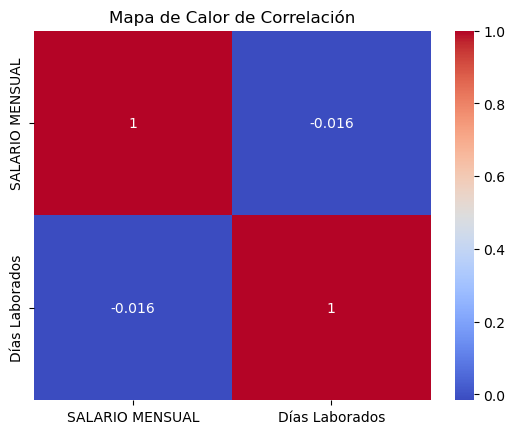

In [172]:
# Mapa de calor de correlación de sueldo y días loborados

corr = source.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlación')
plt.show()

In [26]:
# Crosstab of percentage of active and non active against area
table = pd.crosstab(df_0_0.AREA, df_0_0.Estatus)
table
table.div(table.sum(axis=1).astype(float), axis=0)

Estatus,activo,baja
AREA,,
ALMACEN,0.204545,0.795455
CALIDAD,0.227273,0.772727
MANTENIMIENTO,0.100000,0.900000
PRENSA,0.038961,0.961039
PRODUCCION,0.183824,0.816176


## 6. Referencias
- J. VanderPlas. (2016). [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/). O'Reilly Media.

- UBC MDS. (2019). Material público de los cursos [Programación en Python para Data Science](https://github.com/UBC-MDS/DSCI_531_viz-1) y [Visualización de datos I](https://github.com/UBC-MDS/DSCI_531_viz-1) del _Master in Data Science_ de UBC.

- K. Katari. (Aug 21, 2020).[Exploratory Data Analysis(EDA): Python](https://towardsdatascience.com/exploratory-data-analysis-eda-python-87178e35b14). Towards Data Science. 

- J.M. Reid. (Oct 14, 2021). [13 ways to access data in Python](https://towardsdatascience.com/13-ways-to-access-data-in-python-bac5683e0063). Towards Data Science. 

- A.K. Garg, V. Cuspinera-Contreras, Y. Qian. (Oct 2020). [Bike Sharing Machine Learning Model, EDA section](https://github.com/vcuspinera/MDS_Bike_Sharing/blob/master/eda/EDA.ipynb).

- Pure Storage, Inc. (2022). [Datos estructurados frente a datos no estructurados](https://www.purestorage.com/la/knowledge/big-data/structured-vs-unstructured-data.html).